In [42]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [43]:
g = 9.81
v_t = 30.
C_D = 1/40.
C_L = 1.
v0 = v_t
theta0 = 0.
x0 = 0.
y0 = 1000.

In [44]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2, -g*cos(theta)/v + g/v_t**2*v, v*cos(theta), v*sin(theta)])

In [45]:
def euler_step(u, f, dt):
    return u + dt*f(u)

In [46]:
T = 100.
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0., T, N)
u = numpy.empty((N,4))
u[0] = numpy.array([v0, theta0, x0, y0])
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [47]:
x = u[:,2]
y = u[:,3]

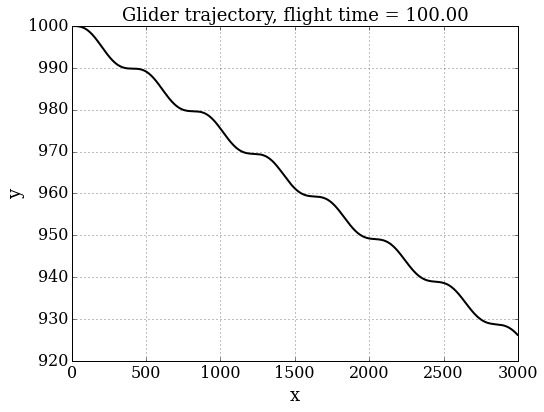

In [48]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

In [49]:
dt_values=numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])
u_values=numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0., T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)
    u_values[i]=u

In [50]:
def get_diffgrid(u_current, u_fine, dt):
    N_current=len(u_current[:,0])
    N_fine=len(u_fine[:,0])
    grid_size_ratio=ceil(N_fine/float(N_current))
    diffgrid=dt*numpy.sum(numpy.abs(u_current[:,1]-u_fine[::grid_size_ratio,1]))
    return diffgrid

In [51]:
diffgrid=numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))
    diffgrid[i]=get_diffgrid(u_values[i], u_values[-1], dt)

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


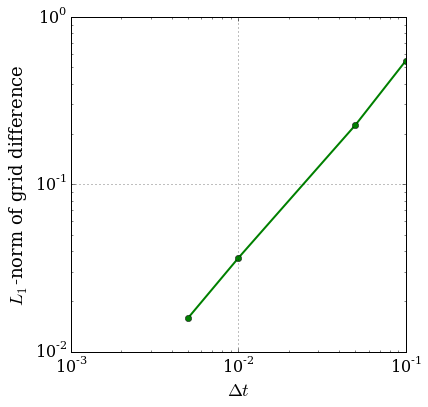

In [52]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of grid difference', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='g', ls='-', lw='2', marker='o')

In [53]:
r=2
h=0.001
dt_values2=numpy.array([h, r*h, r**2*h])
u_values2=numpy.empty_like(dt_values2, dtype=numpy.ndarray)
diffgrid2=numpy.empty(2)
for i, dt in enumerate(dt_values2):
    N = int(T/dt)+1
    t = numpy.linspace(0., T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)
    u_values2[i] = u
diffgrid2[0]= get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])
diffgrid2[1]= get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])
p = log(diffgrid2[1]/diffgrid2[0])/log(r)
print ('The order of convergence is {:.3f}'.format(p))

The order of convergence is 1.014


In [57]:
v0_values = numpy.empty(int((10-4.9)/0.2))

In [58]:
v0_values

array([  1.49026167e-316,   8.18444722e-316,   1.48144240e-316,
         8.18444011e-316,   1.53334380e-316,   8.18444959e-316,
         1.48144240e-316,   8.18445197e-316,   1.53334380e-316,
         8.18445908e-316,   1.48144240e-316,   8.18446145e-316,
         1.53334380e-316,   8.18446382e-316,   1.48144240e-316,
         8.18446620e-316,   1.53334380e-316,   8.18446857e-316,
         1.48144240e-316,   8.18447094e-316,   1.49026365e-316,
         6.32299154e+233,   6.48224638e+170,   5.22411352e+257,
         3.11196661e-306])